<pre>
Jautājumu tips  Skaits     Klases nr
citi             23025             1
darbalaiks         122             2
akademisks          46             0
dokumenti           24             3

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd '/gdrive/My Drive/LU/LU DF/8. semestris/Bakalaura Darbs/Datasets'
import warnings
warnings.filterwarnings('ignore')

In [0]:
import pandas as pd
dataset = pd.read_csv('sakotneja_jautajumu_kopa.csv', index_col=0)
print(dataset.shape)
dataset.head(3)

(23217, 5)


,Topic ID,Question,is_annotated,label,Encoded labels
0,210,"1. septembrī var noslēgt DV līgumu? Un ja var,...",True,darbalaiks,2
1,224,Un kā strādās bibliotēka?,True,darbalaiks,2
2,229,Kāds ir darba laiks 119.kab. piektdienā??? Lūd...,True,darbalaiks,2


In [0]:
import numpy as np
X = dataset['Question'].values.astype('str')
Y = dataset['Encoded labels']
for i in range(15):
  print(X[i*i], Y[i*i])

1. septembrī var noslēgt DV līgumu? Un ja var, tad ir tas pats darba laiks no 10.00 - 17.00? 2
Un kā strādās bibliotēka? 2
Vai kāds zina, kāds būs darba laiks 28. augustā Studentu apkalpošanas birojā MVF? 2
Sveiki! Gribēju uzzināt, kā var paņemt gada pārtraukumu aktīvajās studijās - t.s. akadēmisko gadu? Vai tādā gadījumā es nezaudēju savu budžeta vietu? Kur par to var uzzināt kaut ko vairāk? Paldies. 0
Labvakar! Sakiet, lūdzu, kas nepieciešams, ja gribu ņemt akadēmisko (esmu 2. kursā). Vai tiks man pagarināta skudenta apliecība, vai skaitīšos, ka esmu students? Paldies 0
Gribēju uzzināt, kad raksta iesniegumu akadēmiskā atvaļinājuma ņemšanai, vai obligāti ir jābūt kādam pielikumam. Tajā formā, kas ir pie dokumentiem, ir atvēlēta vieta pielikumam. Kā arī vai var paņemt akadēmisko atvaļinājumu, ja ir parāds, un vai obligāti ir jābūt ārsta izrakstam, vai arī drīkst rakstīt, ka personisku iemeslu dēļ? Cik sīki jāpamato iemesls, kādēļ vēlas pārtraukt uz laiku studijas? 0
Vai ir iespējas pa

<h2>Datu tīrīšana</h2>

In [0]:
for i in range(10):
  print(X[i])

1. septembrī var noslēgt DV līgumu? Un ja var, tad ir tas pats darba laiks no 10.00 - 17.00?
Un kā strādās bibliotēka?
Kāds ir darba laiks 119.kab. piektdienā??? Lūdzu, atbildiet, ja kāds to zina.
Sveikiņi visiem, sakiet, lūdzu, vai abas dienas (23., 24. jūnijs) skaitās kā brīvdienas vai arī vienā no tām lietvedes, bibliotēkas un pārējie tomēr strādās?
Vai kāds zina, kāds būs darba laiks 28. augustā Studentu apkalpošanas birojā MVF?
Kā var paņemt akadēmisko, ja es mācos EVF?
Studēju Vadības zinības. Kā ir iespējams nokārtot akadēmisko gadu? Pie kā jāvēršas? Un vai to visu var darīt cits cilvēks, ja es vairs neesmu Latvijā?
Sveiki, jautājums tāds, cik akadēmiskos var ņemt pēc kārtas? Lieta tāda, ka esmu devusies studēt uz ārzemēm, bet man tur jāpaliek vēl viens gads, pašlaik skaitos, ka esmu akadēmiskajā, vai to var pagarināt uz nākamo gadu arī? Ja var, kur griezties EVF?
Vai ir iespējams pēc bakalaura saņemšanas iestāties maģistros un uzreiz paņemt akadēmisko?
Sveiki! Gribēju uzzināt, 

In [0]:
# Latvian stopwords found here - https://countwordsfree.com/stopwords/latvian
STOPWORDS = ["aiz","ap","ar","apakš","ārpus","augšpus","bez","caur","dēļ","gar","iekš","iz","kopš","labad","lejpus","līdz","no","otrpus","pa","par","pār","pēc","pie","pirms","pret","priekš","starp","šaipus","uz","viņpus","virs","virspus","zem","apakšpus","un","bet","jo","ja","ka","lai","tomēr","tikko","turpretī","arī","kaut","gan","tādēļ","tā","ne","tikvien","vien","kā","ir","te","vai","kamēr","diezin","droši","diemžēl","nebūt","ik","it","taču","nu","pat","tiklab","iekšpus","nedz","tik","nevis","turpretim","jeb","iekam","iekām","iekāms","kolīdz","līdzko","tiklīdz","jebšu","tālab","tāpēc","nekā","itin","jā","jau","jel","nē","nezin","tad","tikai","vis","tak","iekams","būt","biju","biji","bija","bijām","bijāt","esmu","esi","esam","esat","būšu","būsi","būs","būsim","būsiet","tikt","tiku","tiki","tika","tikām","tikāt","tieku","tiec","tiek","tiekam","tiekat","tikšu","tiks","tiksim","tiksiet","tapt","tapi","tapāt","topat","tapšu","tapsi","taps","tapsim","tapsiet","kļūt","kļuvu","kļuvi","kļuva","kļuvām","kļuvāt","kļūstu","kļūsti","kļūst","kļūstam","kļūstat","kļūšu","kļūsi","kļūs","kļūsim","kļūsiet","varēt","varēju","varējām","varēšu","varēsim","var","varēji","varējāt","varēsi","varēsiet","varat","varēja","varēs"]

In [0]:
# Piemērs tīrīšanai aizgūts no - https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568
import re
from bs4 import BeautifulSoup
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;.]')                           # šie simboli tiks aizstāti ar tukšumu
BAD_SYMBOLS_RE = re.compile('[^a-z ēūīāšģķļžčņ]')                               # no teksta tiks izmesti visi simboli, kas nav šo simbolu sarakstā
STOPWORDS = set(STOPWORDS)                                                      # tiks izmesti visi stopvārdi

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [0]:
clean_questions = []
for question in X:
  clean_question = clean_text(question)
  clean_questions.append(clean_question)

In [0]:
X = clean_questions
for i in range(10):
  print(X[i])

septembrī noslēgt dv līgumu tas pats darba laiks
strādās bibliotēka
kāds darba laiks kab piektdienā lūdzu atbildiet kāds to zina
sveikiņi visiem sakiet lūdzu abas dienas jūnijs skaitās brīvdienas vienā tām lietvedes bibliotēkas pārējie strādās
kāds zina kāds darba laiks augustā studentu apkalpošanas birojā mvf
paņemt akadēmisko es mācos evf
studēju vadības zinības iespējams nokārtot akadēmisko gadu jāvēršas to visu darīt cits cilvēks es vairs neesmu latvijā
sveiki jautājums tāds cik akadēmiskos ņemt kārtas lieta tāda devusies studēt ārzemēm man tur jāpaliek vēl viens gads pašlaik skaitos akadēmiskajā to pagarināt nākamo gadu kur griezties evf
iespējams bakalaura saņemšanas iestāties maģistros uzreiz paņemt akadēmisko
sveiki gribēju uzzināt paņemt gada pārtraukumu aktīvajās studijās t s akadēmisko gadu tādā gadījumā es nezaudēju savu budžeta vietu kur to uzzināt ko vairāk paldies


<h2>Eksperimenti</h2>


In [0]:
def transformResults(results):
    mod_results = []
    for result in results:
        out = np.argmax(result)
        mod_results.append(out)
    mod_results = np.array(mod_results)   
    return mod_results 

In [0]:
import datetime
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from keras.preprocessing import text
from keras import models, layers
n_split = 5                                                                     # at each fold, we use 80% / 20% split

exec_start = datetime.datetime.now()
sizes = [100, 200, 300, 400, 500, 750, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
result_table = []
result_header = ['Vārdnīcas izmērs', 'Naive Bayes', '2 slāņu neironu tīkls']
result_table.append(result_header)

for max_words in sizes:
  result_row = []
  result_row.append(max_words)
  
  # Text pre-processing
  tokenize = text.Tokenizer(num_words=max_words, char_level=False)              # izveidojam Tokenizer ar noteikto vārdnīcas izmēru
  tokenize.fit_on_texts(X)                                                      # apmācām Tokenizer uz mūsu datiem
  X2 = tokenize.texts_to_matrix(X)                                              # pārveidojam treniņdatus par tekstvienību vektoriem
  print('Tokenizer done:', max_words, X2.shape)

  f1_scores_naive = []                                                          # Creating an empty array of f1 scores 
  f1_scores_keras = []
  counter = 0
  for train_index,test_index in StratifiedKFold(n_split).split(X2, Y):
    # creating train and test datasets
    x_train,x_test=X2[train_index],X2[test_index]
    y_train,y_test=Y[train_index],Y[test_index]

    ### Naive Bayes ###
    naive_bayes = MultinomialNB()                                               # Izveidojam Naive Bayes modeli
    naive_bayes.fit(x_train, y_train)                                           # Trenējam modeli uz treniņdatiem
    naive_y_pred = naive_bayes.predict(x_test)
    naive_f1_avg = round(f1_score(y_test, naive_y_pred, average='macro'),4)     # Fiksējam Naive Bayes f1 vidējo rezultātu

    f1_scores_naive.append(naive_f1_avg)

    ### Keras Sequential ###
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(max_words,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))

    model.compile(loss=['sparse_categorical_crossentropy'],
                optimizer='adam',
                metrics=['sparse_categorical_crossentropy'])
    batch_size = 64
    epochs = 5
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0)
    y_pred = model.predict(x_test)                                              # Prasam modelim paredzēt testa datiem kategorijas
    keras_y_pred = transformResults(y_pred)                                     # Pārveidojam rezultātus, paņemot ticamāko klasi no varbūtībām
    keras_f1_avg = round(f1_score(y_test, keras_y_pred, average='macro'),4)     # Fiksējam Naive Bayes f1 vidējo rezultātu
    f1_scores_keras.append(keras_f1_avg)
    counter = counter + 1
    print('\tCompleted for vocabulary size:', max_words,' K-Fold #',counter, ' Naive Bayes score:',naive_f1_avg, ' Keras score:',keras_f1_avg)
    
  #After the K-Fold validation
  f1_avg_naive = round(np.mean(f1_scores_naive), 4)
  f1_avg_keras = round(np.mean(f1_scores_keras),4)
  print('    Completed for vocabulary size:', max_words,' Naive Bayes score:',f1_avg_naive, ' Keras score:',f1_avg_keras)
  result_row.append(f1_avg_naive)
  result_row.append(f1_avg_keras)
  result_table.append(result_row)
#In the very end - fix the execution time
exec_end = datetime.datetime.now()
exec_elapsed = exec_end - exec_start
print('Total time elapsed:', exec_elapsed)
result_data = pd.DataFrame(result_table[1:], columns=result_table[0])
result_data.to_csv('2020_05_23_Baseline_results_pamatdati.csv')
result_data

Using TensorFlow backend.


Tokenizer done: 100 (23217, 100)
	Completed for vocabulary size: 100  K-Fold # 1  Naive Bayes score: 0.3077  Keras score: 0.4083
	Completed for vocabulary size: 100  K-Fold # 2  Naive Bayes score: 0.2488  Keras score: 0.2791
	Completed for vocabulary size: 100  K-Fold # 3  Naive Bayes score: 0.3659  Keras score: 0.3854
	Completed for vocabulary size: 100  K-Fold # 4  Naive Bayes score: 0.318  Keras score: 0.3297
	Completed for vocabulary size: 100  K-Fold # 5  Naive Bayes score: 0.3597  Keras score: 0.3459
    Completed for vocabulary size: 100  Naive Bayes score: 0.32  Keras score: 0.3497
Tokenizer done: 200 (23217, 200)
	Completed for vocabulary size: 200  K-Fold # 1  Naive Bayes score: 0.3467  Keras score: 0.4065
	Completed for vocabulary size: 200  K-Fold # 2  Naive Bayes score: 0.2487  Keras score: 0.3114
	Completed for vocabulary size: 200  K-Fold # 3  Naive Bayes score: 0.3945  Keras score: 0.3963
	Completed for vocabulary size: 200  K-Fold # 4  Naive Bayes score: 0.3277  Keras 

,Vārdnīcas izmērs,Naive Bayes,2 slāņu neironu tīkls
0,100,0.3200,0.3497
1,200,0.3439,0.3799
2,300,0.4443,0.4221
3,400,0.4593,0.4365
4,500,0.4322,0.4374
5,750,0.4668,0.4392
6,1000,0.4587,0.4385
7,2000,0.3915,0.4725
8,3000,0.3669,0.4694
9,4000,0.3442,0.4841


<h3>Pārpratumu matrica vienam modelim. Vārdnīcas izmērs = 1000</h3>

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from keras.preprocessing import text
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
print(len(X[0]), len(Y))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)        # Veicam datu sadalīšanu testa un treniņa datos
print(len(X_train), len(X_test))

48 23217
18573 4644


In [0]:
# Text pre-processing
max_words = 1000                                                                # uzstādām vārdnīcas izmēru
tokenize = text.Tokenizer(num_words=max_words, char_level=False)                # izveidojam Tokenizer ar noteikto vārdnīcas izmēru
tokenize.fit_on_texts(X_train)                                                  # apmācām Tokenizer uz mūsu treniņdatiem
x_train = tokenize.texts_to_matrix(X_train)                                     # pārveidojam treniņdatus par tekstvienību vektoriem
x_test = tokenize.texts_to_matrix(X_test)                                       # pārveidojam testa datus par tekstvienību vektoriem
naive_bayes = MultinomialNB()                                                   # Izveidojam Naive Bayes modeli
naive_bayes.fit(x_train, y_train)                                               # Trenējam modeli uz treniņdatiem
y_pred = naive_bayes.predict(x_test)                                            # Prasam modelim paredzēt testa datiem kategorijas

              precision    recall  f1-score   support

  akadēmisks       0.11      0.12      0.12         8
        citi       1.00      0.99      1.00      4616
 darba laiks       0.43      0.62      0.51        16
   dokumenti       0.00      0.00      0.00         4

    accuracy                           0.99      4644
   macro avg       0.39      0.44      0.41      4644
weighted avg       0.99      0.99      0.99      4644



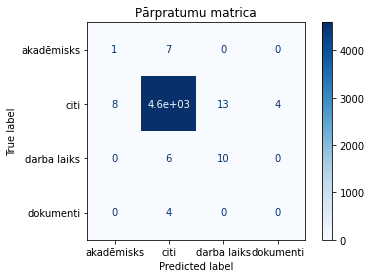

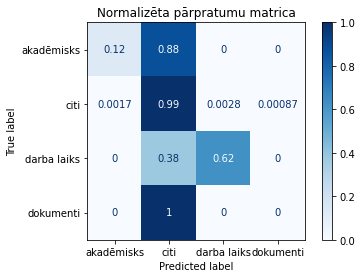

In [0]:
class_names = ['akadēmisks', 'citi', 'darba laiks', 'dokumenti']
print(classification_report(y_test, y_pred, target_names=class_names))

np.set_printoptions(precision=2)
titles_options = [("Pārpratumu matrica", None),                                 # Izveidojam pārpratumu un normalizēto pārpratumu matricu
                  ("Normalizēta pārpratumu matrica", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(naive_bayes, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

<h2>Papildinātā datu kopa</h2>

In [0]:
dataset2 = pd.read_csv('papildinatie_jautajumi_cleaned.csv', index_col=0)
dataset2['labels'].value_counts()

1    23025
3      122
2      122
0      122
Name: labels, dtype: int64

In [0]:
X = dataset2['Question'].values.astype('str')
Y = dataset2['labels']
print(Y.shape, len(X))

(23391,) 23391


In [0]:
n_split = 5                                                                     # at each fold, we use 80% / 20% split
exec_start = datetime.datetime.now()
sizes = [100, 200, 300, 400, 500, 750, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
result_table = []
result_header = ['Vārdnīcas izmērs', 'Naive Bayes', '2 slāņu neironu tīkls']
result_table.append(result_header)

for max_words in sizes:
  result_row = []
  result_row.append(max_words)
  
  # Text pre-processing
  tokenize = text.Tokenizer(num_words=max_words, char_level=False)              # izveidojam Tokenizer ar noteikto vārdnīcas izmēru
  tokenize.fit_on_texts(X)                                                      # apmācām Tokenizer uz mūsu datiem
  X2 = tokenize.texts_to_matrix(X)                                              # pārveidojam treniņdatus par tekstvienību vektoriem
  print('Tokenizer done:', max_words, X2.shape)

  f1_scores_naive = []                                                          # Creating an empty array of f1 scores 
  f1_scores_keras = []
  counter = 0
  for train_index,test_index in StratifiedKFold(n_split).split(X2, Y):
    # creating train and test datasets
    x_train,x_test=X2[train_index],X2[test_index]
    y_train,y_test=Y[train_index],Y[test_index]

    ### Naive Bayes ###
    naive_bayes = MultinomialNB()                                               # Izveidojam Naive Bayes modeli
    naive_bayes.fit(x_train, y_train)                                           # Trenējam modeli uz treniņdatiem
    naive_y_pred = naive_bayes.predict(x_test)
    naive_f1_avg = round(f1_score(y_test, naive_y_pred, average='macro'),4)     # Fiksējam Naive Bayes f1 vidējo rezultātu

    f1_scores_naive.append(naive_f1_avg)

    ### Keras Sequential ###
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(max_words,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))

    model.compile(loss=['sparse_categorical_crossentropy'],
                optimizer='adam',
                metrics=['sparse_categorical_crossentropy'])
    batch_size = 64
    epochs = 5
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0)
    y_pred = model.predict(x_test)                                              # Prasam modelim paredzēt testa datiem kategorijas
    keras_y_pred = transformResults(y_pred)                                     # Pārveidojam rezultātus, paņemot ticamāko klasi no varbūtībām
    keras_f1_avg = round(f1_score(y_test, keras_y_pred, average='macro'),4)     # Fiksējam Naive Bayes f1 vidējo rezultātu
    f1_scores_keras.append(keras_f1_avg)
    counter = counter + 1
    print('\tCompleted for vocabulary size:', max_words,' K-Fold #',counter, ' Naive Bayes score:',naive_f1_avg, ' Keras score:',keras_f1_avg)
    
  #After the K-Fold validation
  f1_avg_naive = round(np.mean(f1_scores_naive), 4)
  f1_avg_keras = round(np.mean(f1_scores_keras),4)
  print('    Completed for vocabulary size:', max_words,' Naive Bayes score:',f1_avg_naive, ' Keras score:',f1_avg_keras)
  result_row.append(f1_avg_naive)
  result_row.append(f1_avg_keras)
  result_table.append(result_row)
#In the very end - fix the execution time
exec_end = datetime.datetime.now()
exec_elapsed = exec_end - exec_start
print('Total time elapsed:', exec_elapsed)
result_data = pd.DataFrame(result_table[1:], columns=result_table[0])
result_data.to_csv('2020_05_23_Baseline_results_papildinatie.csv')
result_data

Tokenizer done: 100 (23391, 100)
	Completed for vocabulary size: 100  K-Fold # 1  Naive Bayes score: 0.3067  Keras score: 0.4239
	Completed for vocabulary size: 100  K-Fold # 2  Naive Bayes score: 0.2478  Keras score: 0.3051
	Completed for vocabulary size: 100  K-Fold # 3  Naive Bayes score: 0.3194  Keras score: 0.3731
	Completed for vocabulary size: 100  K-Fold # 4  Naive Bayes score: 0.3169  Keras score: 0.3419
	Completed for vocabulary size: 100  K-Fold # 5  Naive Bayes score: 0.3169  Keras score: 0.3314
    Completed for vocabulary size: 100  Naive Bayes score: 0.3015  Keras score: 0.3551
Tokenizer done: 200 (23391, 200)
	Completed for vocabulary size: 200  K-Fold # 1  Naive Bayes score: 0.3613  Keras score: 0.435
	Completed for vocabulary size: 200  K-Fold # 2  Naive Bayes score: 0.2797  Keras score: 0.3602
	Completed for vocabulary size: 200  K-Fold # 3  Naive Bayes score: 0.3424  Keras score: 0.4541
	Completed for vocabulary size: 200  K-Fold # 4  Naive Bayes score: 0.3264  Kera

,Vārdnīcas izmērs,Naive Bayes,2 slāņu neironu tīkls
0,100,0.3015,0.3551
1,200,0.3337,0.4142
2,300,0.4802,0.5455
3,400,0.5453,0.5675
4,500,0.5259,0.5618
5,750,0.5611,0.6002
6,1000,0.5663,0.6061
7,2000,0.5260,0.6501
8,3000,0.5088,0.6545
9,4000,0.4620,0.6718


<h3>Pārpratumu matrica vienam modelim. Vārdnīcas izmērs = 1000</h3>

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from keras.preprocessing import text
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
print(len(X[0]), len(Y))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)        # Veicam datu sadalīšanu testa un treniņa datos
print(len(X_train), len(X_test))

48 23391
18712 4679


In [0]:
# Text pre-processing
max_words = 1000                                                                # uzstādām vārdnīcas izmēru
tokenize = text.Tokenizer(num_words=max_words, char_level=False)                # izveidojam Tokenizer ar noteikto vārdnīcas izmēru
tokenize.fit_on_texts(X_train)                                                  # apmācām Tokenizer uz mūsu treniņdatiem
x_train = tokenize.texts_to_matrix(X_train)                                     # pārveidojam treniņdatus par tekstvienību vektoriem
x_test = tokenize.texts_to_matrix(X_test)                                       # pārveidojam testa datus par tekstvienību vektoriem
naive_bayes = MultinomialNB()                                                   # Izveidojam Naive Bayes modeli
naive_bayes.fit(x_train, y_train)                                               # Trenējam modeli uz treniņdatiem
y_pred = naive_bayes.predict(x_test)                                            # Prasam modelim paredzēt testa datiem kategorijas

              precision    recall  f1-score   support

  akadēmisks       0.46      0.46      0.46        24
        citi       0.99      0.99      0.99      4615
 darba laiks       0.42      0.65      0.51        17
   dokumenti       0.44      0.35      0.39        23

    accuracy                           0.98      4679
   macro avg       0.58      0.61      0.59      4679
weighted avg       0.99      0.98      0.98      4679



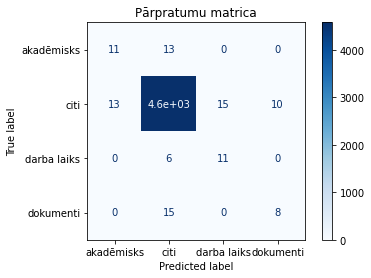

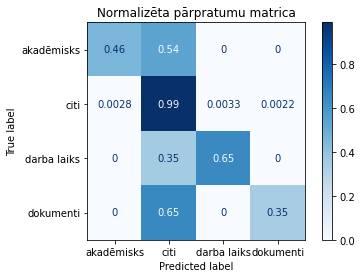

In [0]:
class_names = ['akadēmisks', 'citi', 'darba laiks', 'dokumenti']
print(classification_report(y_test, y_pred, target_names=class_names))

np.set_printoptions(precision=2)
titles_options = [("Pārpratumu matrica", None),                                 # Izveidojam pārpratumu un normalizēto pārpratumu matricu
                  ("Normalizēta pārpratumu matrica", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(naive_bayes, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

<h2>Variācija - veicam Tokenizing tikai uz treniņdatiem. Rezultāti ļoti līdzīgi, atšķirība 1-% ietvaros</h2>

In [0]:
def transformResults(results):
    mod_results = []
    for result in results:
        out = np.argmax(result)
        mod_results.append(out)
    mod_results = np.array(mod_results)   
    return mod_results 

In [0]:
import datetime
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from keras.preprocessing import text
from keras import models, layers
n_split = 5                                                                     # at each fold, we use 80% / 20% split

exec_start = datetime.datetime.now()
sizes = [100, 200, 300, 400, 500, 750, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
result_table = []
result_header = ['Vārdnīcas izmērs', 'Naive Bayes', '2 slāņu neironu tīkls']
result_table.append(result_header)

for max_words in sizes:
  result_row = []
  result_row.append(max_words)
  
  f1_scores_naive = []                                                          # Creating an empty array of f1 scores 
  f1_scores_keras = []
  counter = 0
  for train_index,test_index in StratifiedKFold(n_split).split(X, Y):
    # creating train and test datasets
    x_train,x_test=X[train_index],X[test_index]
    y_train,y_test=Y[train_index],Y[test_index]

    # Text pre-processing
    tokenize = text.Tokenizer(num_words=max_words, char_level=False)            # izveidojam Tokenizer ar noteikto vārdnīcas izmēru
    tokenize.fit_on_texts(x_train)                                              # apmācām Tokenizer uz mūsu datiem
    x_train = tokenize.texts_to_matrix(x_train)                                 # pārveidojam treniņdatus par tekstvienību vektoriem
    x_test = tokenize.texts_to_matrix(x_test)                                   # pārveidojam testa datus par tekstvienību vektoriem

    ### Naive Bayes ###
    naive_bayes = MultinomialNB()                                               # Izveidojam Naive Bayes modeli
    naive_bayes.fit(x_train, y_train)                                           # Trenējam modeli uz treniņdatiem
    naive_y_pred = naive_bayes.predict(x_test)
    naive_f1_avg = round(f1_score(y_test, naive_y_pred, average='macro'),4)     # Fiksējam Naive Bayes f1 vidējo rezultātu

    f1_scores_naive.append(naive_f1_avg)

    ### Keras Sequential ###
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(max_words,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))

    model.compile(loss=['sparse_categorical_crossentropy'],
                optimizer='adam',
                metrics=['sparse_categorical_crossentropy'])
    batch_size = 64
    epochs = 5
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0)
    y_pred = model.predict(x_test)                                              # Prasam modelim paredzēt testa datiem kategorijas
    keras_y_pred = transformResults(y_pred)                                     # Pārveidojam rezultātus, paņemot ticamāko klasi no varbūtībām
    keras_f1_avg = round(f1_score(y_test, keras_y_pred, average='macro'),4)     # Fiksējam Naive Bayes f1 vidējo rezultātu
    f1_scores_keras.append(keras_f1_avg)
    counter = counter + 1
    print('\tCompleted for vocabulary size:', max_words,' K-Fold #',counter, ' Naive Bayes score:',naive_f1_avg, ' Keras score:',keras_f1_avg)
    
  #After the K-Fold validation
  f1_avg_naive = round(np.mean(f1_scores_naive), 4)
  f1_avg_keras = round(np.mean(f1_scores_keras),4)
  print('    Completed for vocabulary size:', max_words,' Naive Bayes score:',f1_avg_naive, ' Keras score:',f1_avg_keras)
  result_row.append(f1_avg_naive)
  result_row.append(f1_avg_keras)
  result_table.append(result_row)
#In the very end - fix the execution time
exec_end = datetime.datetime.now()
exec_elapsed = exec_end - exec_start
print('Total time elapsed:', exec_elapsed)
result_data = pd.DataFrame(result_table[1:], columns=result_table[0])
result_data.to_csv('2020_05_23_Baseline_results_pamatdati_2.csv')
result_data

	Completed for vocabulary size: 100  K-Fold # 1  Naive Bayes score: 0.306  Keras score: 0.399
	Completed for vocabulary size: 100  K-Fold # 2  Naive Bayes score: 0.2488  Keras score: 0.3147
	Completed for vocabulary size: 100  K-Fold # 3  Naive Bayes score: 0.355  Keras score: 0.3807
	Completed for vocabulary size: 100  K-Fold # 4  Naive Bayes score: 0.3025  Keras score: 0.3205
	Completed for vocabulary size: 100  K-Fold # 5  Naive Bayes score: 0.3741  Keras score: 0.3543
    Completed for vocabulary size: 100  Naive Bayes score: 0.3173  Keras score: 0.3538
	Completed for vocabulary size: 200  K-Fold # 1  Naive Bayes score: 0.3467  Keras score: 0.3854
	Completed for vocabulary size: 200  K-Fold # 2  Naive Bayes score: 0.2486  Keras score: 0.3095
	Completed for vocabulary size: 200  K-Fold # 3  Naive Bayes score: 0.3927  Keras score: 0.3621
	Completed for vocabulary size: 200  K-Fold # 4  Naive Bayes score: 0.3299  Keras score: 0.3815
	Completed for vocabulary size: 200  K-Fold # 5  Nai

,Vārdnīcas izmērs,Naive Bayes,2 slāņu neironu tīkls
0,100,0.3173,0.3538
1,200,0.3350,0.3705
2,300,0.4316,0.4271
3,400,0.4548,0.4463
4,500,0.4395,0.4603
5,750,0.4699,0.4324
6,1000,0.4627,0.4445
7,2000,0.3972,0.4811
8,3000,0.3654,0.4944
9,4000,0.3403,0.4811
